# COVID-19 Global Data Analysis and Visualization

## Introduction:
In this project, I performed an exploratory data analysis (EDA) on a global COVID-19 dataset. The dataset contains country-wise information on confirmed cases, deaths, recoveries, new cases, and week-over-week percentage increases.

The objective of this analysis is to:

Understand the global impact of COVID-19.

Identify the most and least affected countries.

Analyze recovery and death rates.

Compare WHO regions based on confirmed cases, deaths, and recoveries.

Handle special cases like missing or infinite values for accurate visualization.

Multiple visualizations such as bar charts, horizontal bar charts, scatter plots, pie charts, and grouped bar charts were created using Matplotlib libraries to effectively communicate the trends and patterns in the data.

In [117]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading all csv files


### 1. Getting started and knowing our dataset:

#### (i) printing the head and tail of dataset to know basic structure

In [118]:
df1=pd.read_csv("country_wise_latest.csv")
print(df1.head(10).to_string(),"\n\n\n")
print(df1.head(10).to_string())

        Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Confirmed last week  1 week change  1 week % increase             WHO Region
0          Afghanistan      36263    1269      25198    9796        106          10             18                3.50                  69.49                    5.04                35526            737               2.07  Eastern Mediterranean
1              Albania       4880     144       2745    1991        117           6             63                2.95                  56.25                    5.25                 4171            709              17.00                 Europe
2              Algeria      27973    1163      18837    7973        616           8            749                4.16                  67.34                    6.17                23691           4282              18.07                 Africa
3              Andorra  

#### (ii) printing all the columns:

In [119]:
print(df1.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


#### (iii) getting info: (datatypes of each column)

In [120]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

#### (iv) describing the dataframe:

In [121]:
print(df1.describe().to_string())

          Confirmed         Deaths     Recovered        Active     New cases   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Confirmed last week  1 week change  1 week % increase
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   187.000000     187.000000          187.000000             187.000000                  187.00         1.870000e+02     187.000000         187.000000
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219    28.957219     933.812834            3.019519              64.820535                     inf         7.868248e+04    9448.459893          13.606203
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   120.037173    4197.719635            3.454302              26.287694                     NaN         3.382737e+05   47491.127684          24.509838
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000     0.000000   

/Users/kunaljoshi/Desktop/jupyter/venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


#### (v) finding if there any null values in dataset:

In [122]:
print(df1.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


### (vi) Removing duplicates if there any :

In [123]:
df1.duplicated()
df1.drop_duplicates(inplace=True)

# Analysis:

### 1. Total Cases, Recovered, Deaths:

Total number of cases worldwide : 16480485
Total number of deaths worldwide : 654036
Total number of recovered worldwide : 9468087
Total death percentage is 3.968548255709708
Total Recovery percentage is 57.450293483474546


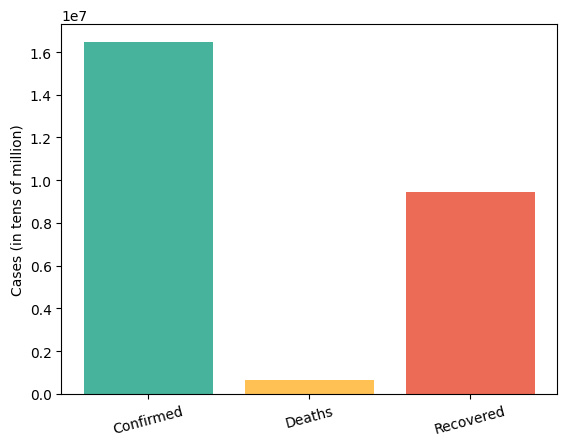

In [137]:
total_cases_worldwide=df1["Confirmed"].sum()
print("Total number of cases worldwide :",total_cases_worldwide)
total_deaths_worldwide=df1["Deaths"].sum()
print("Total number of deaths worldwide :",total_deaths_worldwide)
total_recovered_worldwide=df1["Recovered"].sum()
print("Total number of recovered worldwide :",total_recovered_worldwide)

total_death_percentage=(total_deaths_worldwide/total_cases_worldwide)*100
total_recovery_percentage=(total_recovered_worldwide/total_cases_worldwide)*100


pie_total=[total_cases_worldwide,total_deaths_worldwide,total_recovered_worldwide]

labell=["Confirmed", "Deaths","Recovered"]

plt.bar(labell,pie_total,color=["#47B39C","#FFC154","#EC6B56"])
plt.ylabel("Cases (in tens of million)")
plt.xticks(rotation=15)

print("Total death percentage is",total_death_percentage)
print("Total Recovery percentage is",total_recovery_percentage)

### # Finding (1) => 1. Total Death Percentage worldwide is around 4%

### 2. Total Recovery Percentage worldwide is around 58%

### 2. Top 10 countries by confirmed cases:

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606


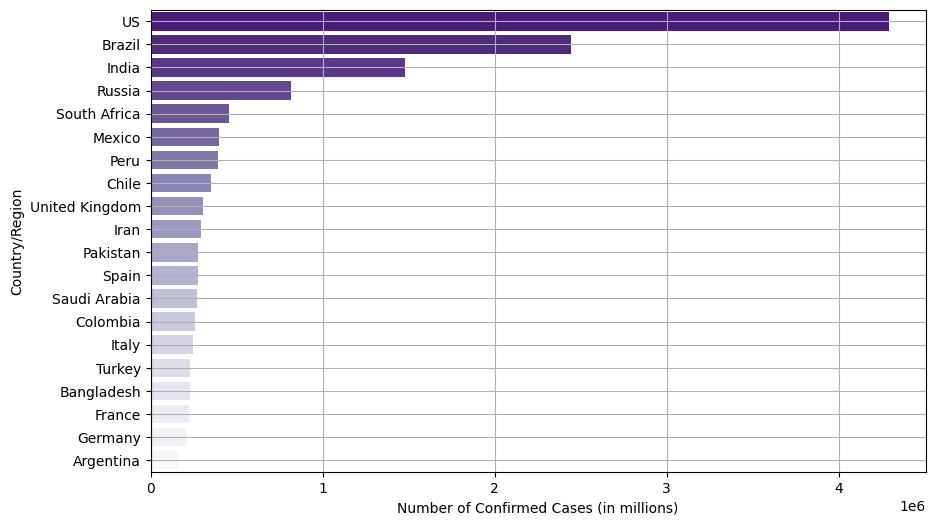

In [125]:
df_confirmed_cases=df1.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)
print(df_confirmed_cases.head(10).to_string())

plt.figure(figsize=(10,6))

top_10_df = df_confirmed_cases.head(20).reset_index()


sns.barplot(x='Confirmed', y='Country/Region', data=top_10_df, palette="Purples_r", hue="Country/Region", dodge=False)

plt.xlabel("Number of Confirmed Cases (in millions)")
plt.grid()

### #Finding (2) => Highest Confirmed cases are in US, followed Brazil and India.

### 3. Top 10 Countries by Death Rate:

Country/Region
Yemen             28.56
United Kingdom    15.19
Belgium           14.79
Italy             14.26
France            13.71
Hungary           13.40
Netherlands       11.53
Mexico            11.13
Spain             10.44
Western Sahara    10.00
Name: Deaths / 100 Cases, dtype: float64


Text(0, 0.5, 'Deaths per 100 Confirmed Cases')

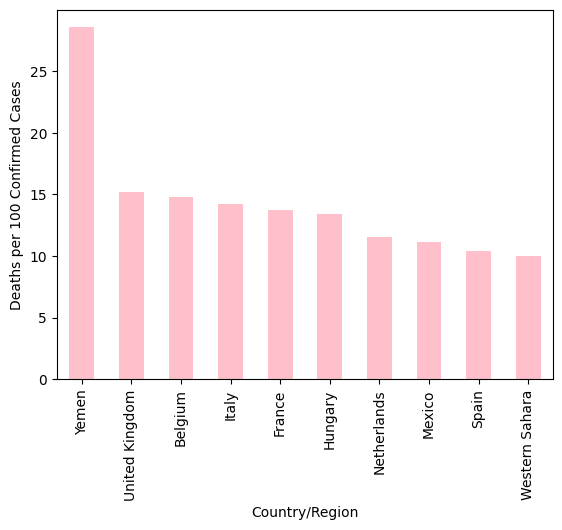

In [126]:
top_death_rate=df1.groupby("Country/Region")["Deaths / 100 Cases"].sum().sort_values(ascending=False).head(10)
print(top_death_rate)

top_death_rate.plot(kind="bar",color="pink")
plt.ylabel("Deaths per 100 Confirmed Cases")

### #Finding (3) => The highest death rate is in Yemen, followed by UK and Belgium.

### 4. Top 10 countries by Recovery Rate:

Country/Region
Holy See       100.00
Grenada        100.00
Dominica       100.00
Djibouti        98.38
Iceland         98.33
Brunei          97.87
New Zealand     97.24
Qatar           97.02
Malaysia        96.60
Mauritius       96.51
Name: Recovered / 100 Cases, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Holy See'),
  Text(1, 0, 'Grenada'),
  Text(2, 0, 'Dominica'),
  Text(3, 0, 'Djibouti'),
  Text(4, 0, 'Iceland'),
  Text(5, 0, 'Brunei'),
  Text(6, 0, 'New Zealand'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Malaysia'),
  Text(9, 0, 'Mauritius')])

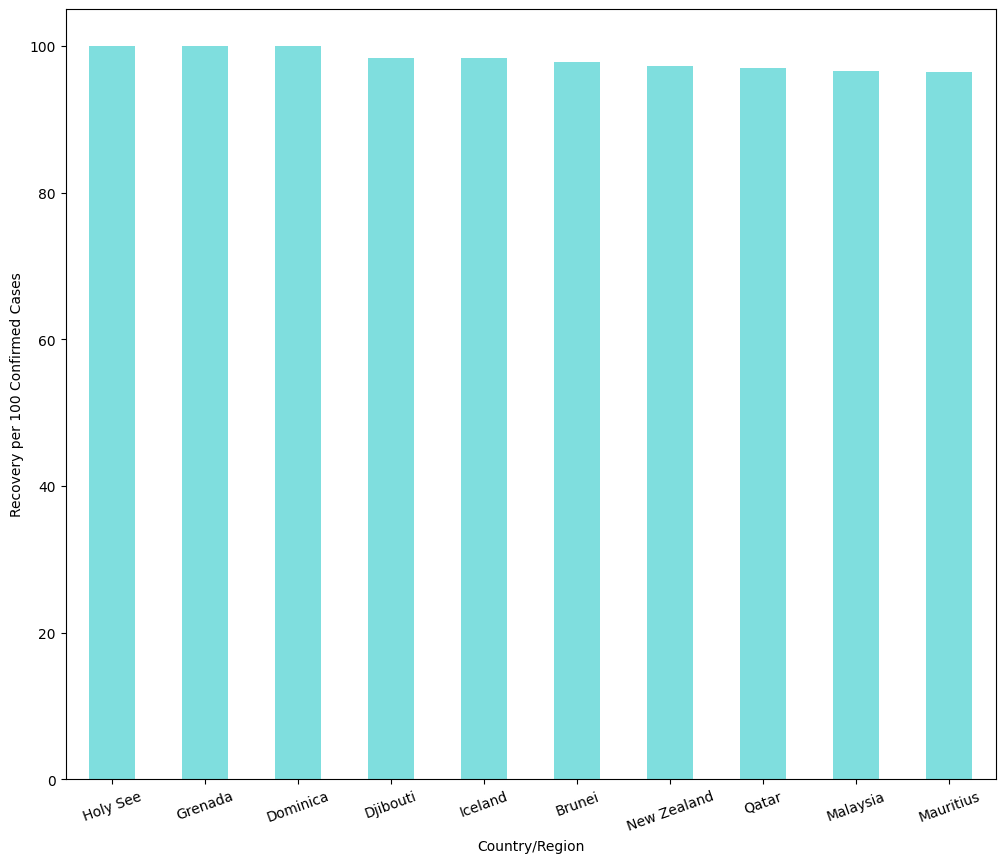

In [142]:
top_recovery_rate=df1.groupby("Country/Region")["Recovered / 100 Cases"].sum().sort_values(ascending=False).head(10)
print(top_recovery_rate)

plt.figure(figsize=(12,10))
top_recovery_rate.plot(kind="bar",color="c", alpha=0.5)
plt.ylabel("Recovery per 100 Confirmed Cases")
plt.xticks(rotation=20)

### # Finding (4) => Three countries with 100% recovery rate that are Holy See, Dominica, Grenada.

### 5. New Cases vs New Deaths:

Text(0, 0.5, 'Number Of Cases')

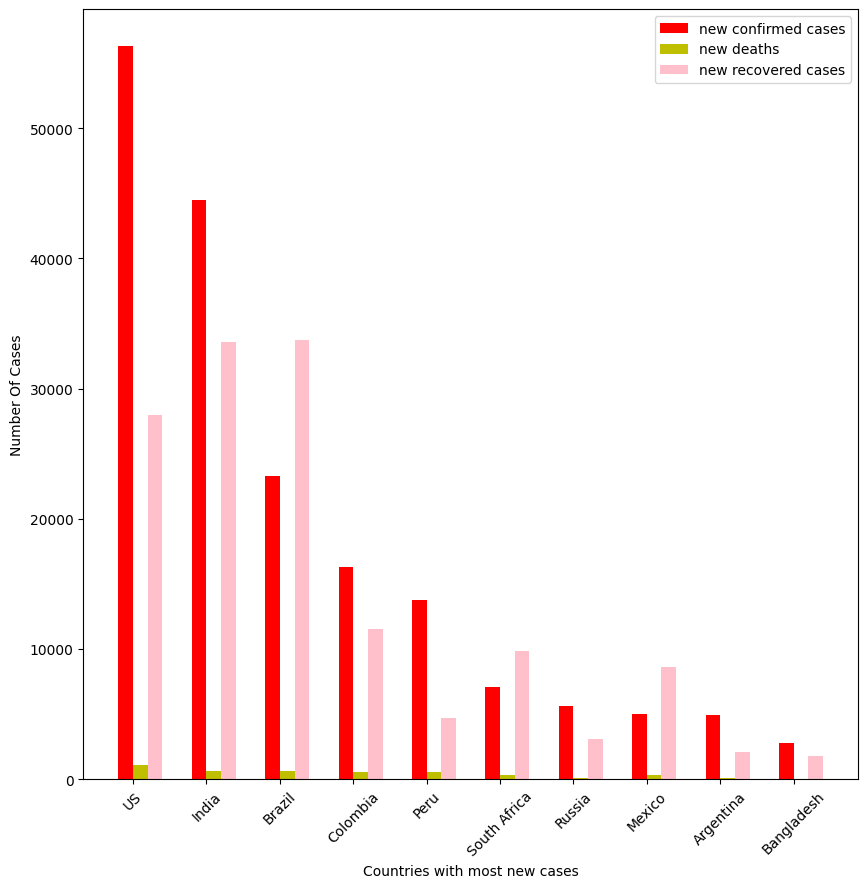

In [128]:
df_top_newcases=df1.sort_values(by="New cases",ascending=False).head(10)
df_new_cases=df_top_newcases["New cases"].head(10)
df_new_deaths=df_top_newcases["New deaths"].head(10)
df_new_recovered=df_top_newcases["New recovered"].head(10)
df_new_countries=df_top_newcases["Country/Region"].head(10)

width=0.3
p=np.arange(len(df_new_countries))*1.5
p1=[i+width for i in p]
p2=[i+2*width for i in p]

plt.figure(figsize=(10,10))
plt.bar(p,df_new_cases,width,color="r", label="new confirmed cases") 
plt.bar(p1,df_new_deaths,width,color="y", label="new deaths") 
plt.bar(p2,df_new_recovered,width,color="pink", label="new recovered cases") 
plt.xticks(p+width/2, df_new_countries, rotation=45 )
plt.legend()
plt.xlabel("Countries with most new cases")
plt.ylabel("Number Of Cases")

### #Finding (5) => The Highest number of New Cases are in US, followed by India and Brazil.

### 6. Countrie with highest 1week % increase:

       Country/Region  1 week % increase
130  Papua New Guinea             226.32
63             Gambia             191.07
11            Bahamas             119.54
186          Zimbabwe              57.85
99              Libya              42.78
58           Ethiopia              42.52
22           Botswana              41.57
97            Lesotho              40.67
160          Suriname              37.44
41         Costa Rica              37.34


Text(0, 0.5, '1 week % increase')

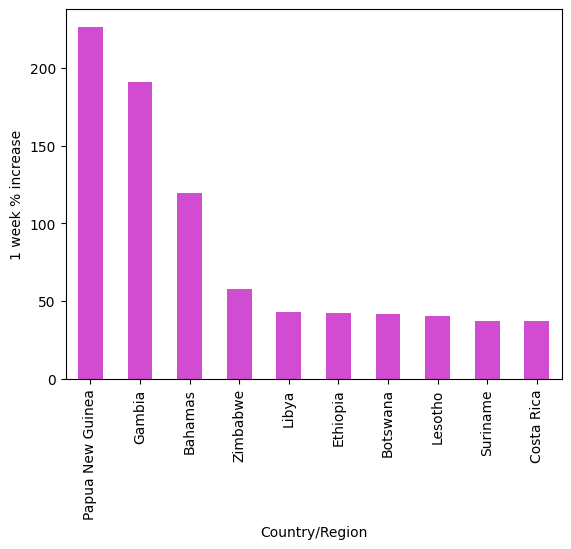

In [145]:
df_1week_highest=df1[["Country/Region", "1 week % increase"]].sort_values(by="1 week % increase",ascending=False).head(10)
print(df_1week_highest)
df_1week_highest.set_index("Country/Region", inplace=True)

df_1week_highest.plot(kind= "bar", legend=False, color="m", alpha=0.7)
plt.ylabel("1 week % increase")

### #Finding (6) => Country with highest 1 week percentage increase is Papua New Guinea followed by Gambia and Bahamas.

### 7. WHO region wise Total Cases:

                       Confirmed  Deaths  Recovered   Active  New cases  New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Confirmed last week  1 week change  1 week % increase
WHO Region                                                                                                                                                                                                                  
Africa                    723207   12223     440645   270339      12176         353          14563              110.71                2736.71                     inf               608120         115087             868.15
Americas                 8839286  342732    4468616  4027938     129531        3555          94776              106.84                2180.20                     inf              7815198        1024088             571.59
Eastern Mediterranean    1490744   38339    1201400   251005      12410         445          14843               78.

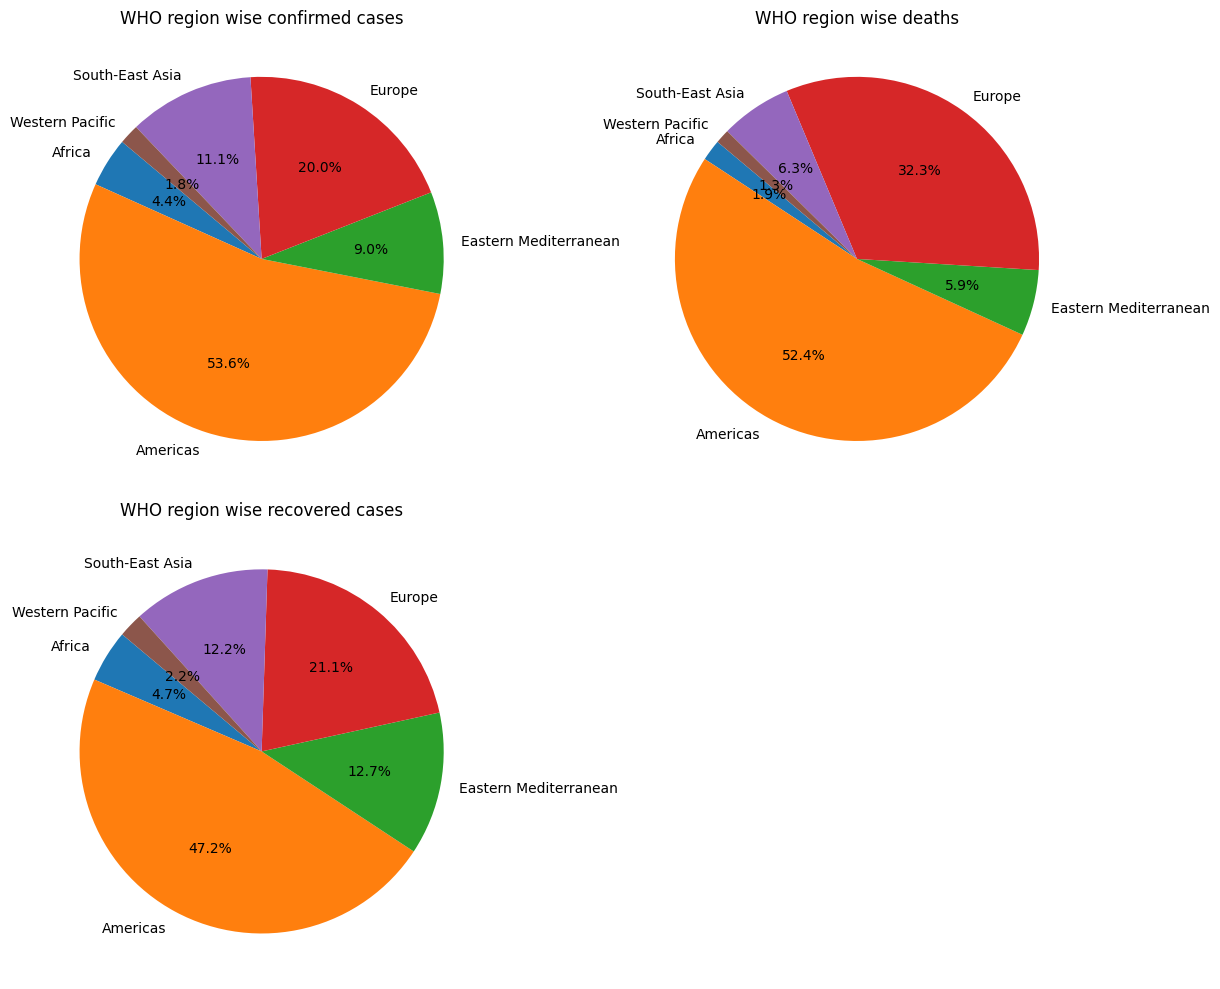

In [130]:
df_who=df1.groupby("WHO Region").sum(numeric_only=True)
print(df_who.to_string())
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.pie(df_who["Confirmed"], labels=df_who.index, autopct="%1.1f%%", startangle=140)
plt.title("WHO region wise confirmed cases")

plt.subplot(2,2,2)
plt.pie(df_who["Deaths"], labels=df_who.index, autopct="%1.1f%%", startangle=140)
plt.title("WHO region wise deaths")

plt.subplot(2,2,3)
plt.pie(df_who["Recovered"], labels=df_who.index, autopct="%1.1f%%", startangle=140)
plt.title("WHO region wise recovered cases")

plt.tight_layout()
plt.show()


### #Finding (7) => Most affected WHO region is Americas followed by Europe and Eastern Mediterranean.

### 8. Countries with lowest death rate among top 20 most affected :

     Country/Region  Deaths / 100 Cases
177  United Kingdom               15.19
85            Italy               14.26
61           France               13.71
111          Mexico               11.13
157           Spain               10.44
81             Iran                5.42
132            Peru                4.73
65          Germany                4.41
23           Brazil                3.59
173              US                3.45
37         Colombia                3.41
35            Chile                2.64
172          Turkey                2.48
79            India                2.26
128        Pakistan                2.13
6         Argentina                1.83
138          Russia                1.63
154    South Africa                1.56
13       Bangladesh                1.31
145    Saudi Arabia                1.03


/var/folders/j3/xxzh4f157s9dcyshl829bff40000gn/T/ipykernel_18727/172021107.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Deaths / 100 Cases", y="Country/Region", data=df_lowest_death_rate, palette="YlGnBu", legend=False)


<Axes: xlabel='Deaths / 100 Cases', ylabel='Country/Region'>

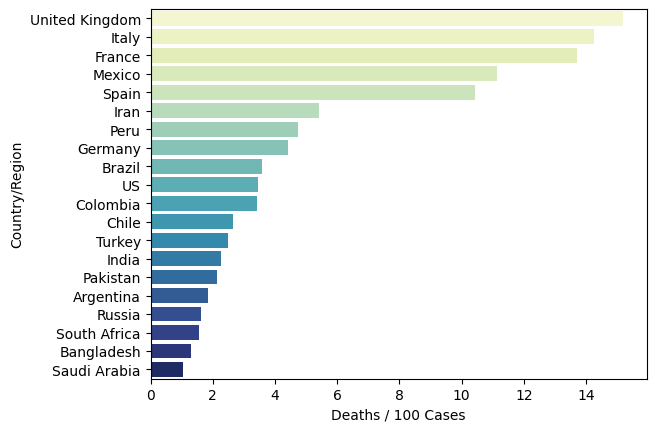

In [ ]:
df_most_affected=df1.sort_values(by="Confirmed", ascending=False).head(20)

# print(df_most_affected)
df_lowest_death_rate=df_most_affected[["Country/Region","Deaths / 100 Cases"]].sort_values(by="Deaths / 100 Cases",ascending=False)
print(df_lowest_death_rate)



sns.barplot(x="Deaths / 100 Cases", y="Country/Region", data=df_lowest_death_rate, palette="YlGnBu", legend=False)



### #Finding (8) => Country with Lowest death rate among top 20 most affected Countries is Saudi Arabia followed by Bangladesh and South Africa.

### 9. Countries With More than 80% Recovery Rate:

Number of Countries with more than 80% recovery rate is 66


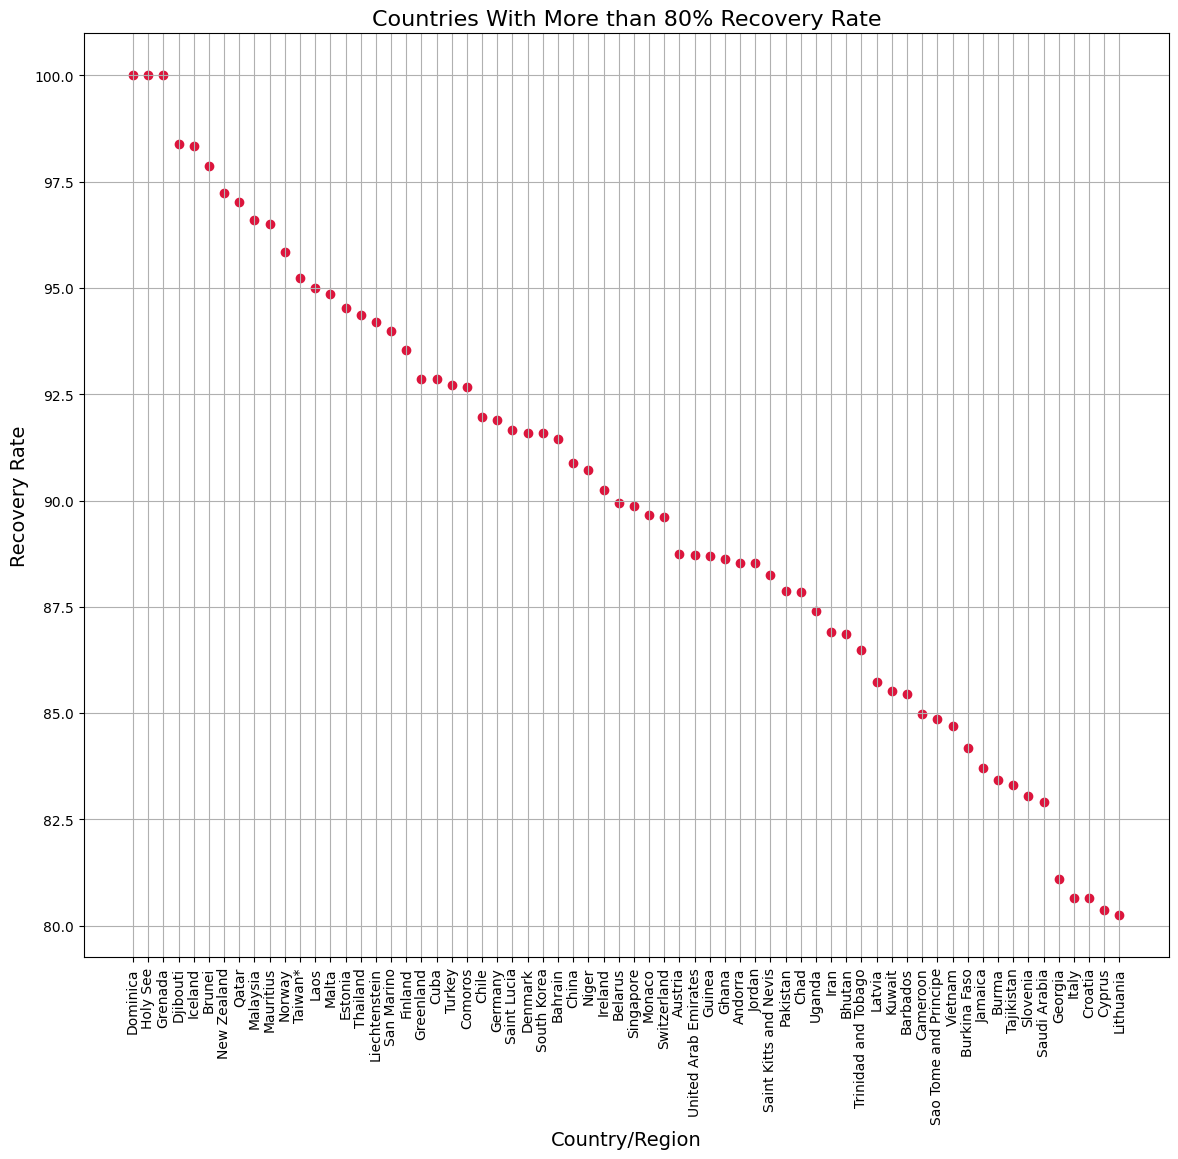

In [149]:
df_more_80_recovery=df1[df1["Recovered / 100 Cases"]>80].sort_values(by="Recovered / 100 Cases", ascending=False)
# print(df_more_80_recovery.to_string())
print("Number of Countries with more than 80% recovery rate is",df_more_80_recovery["Country/Region"].count())

plt.figure(figsize=(14,12))
plt.scatter(df_more_80_recovery["Country/Region"],df_more_80_recovery["Recovered / 100 Cases"],color="crimson")
plt.xticks(rotation=90)
plt.xlabel("Country/Region",fontsize=14)
plt.ylabel("Recovery Rate",fontsize=14)
plt.title("Countries With More than 80% Recovery Rate",fontsize=16)
plt.grid()

### #Finding (9) => There are three countries with 100% recovery rate that are Dominica, Holy See and Grenada. And in total there are 66 countries with more than 80% recovery rate.

### 10. Deaths per recovery ratio analysis :

--->The 3999 (greater than others) means There is no recovery but only deaths
     Country/Region  Deaths / 100 Recovered
147          Serbia                 3999.00
163           Syria                 3999.00
161          Sweden                 3999.00
117      Mozambique                 3999.00
32           Canada                 3999.00
120     Netherlands                 3259.26
177  United Kingdom                 3190.26
184           Yemen                   57.98
16          Belgium                   56.28
61           France                   37.20


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Serbia'),
  Text(1, 0, 'Syria'),
  Text(2, 0, 'Sweden'),
  Text(3, 0, 'Mozambique'),
  Text(4, 0, 'Canada'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'Yemen'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'France')])

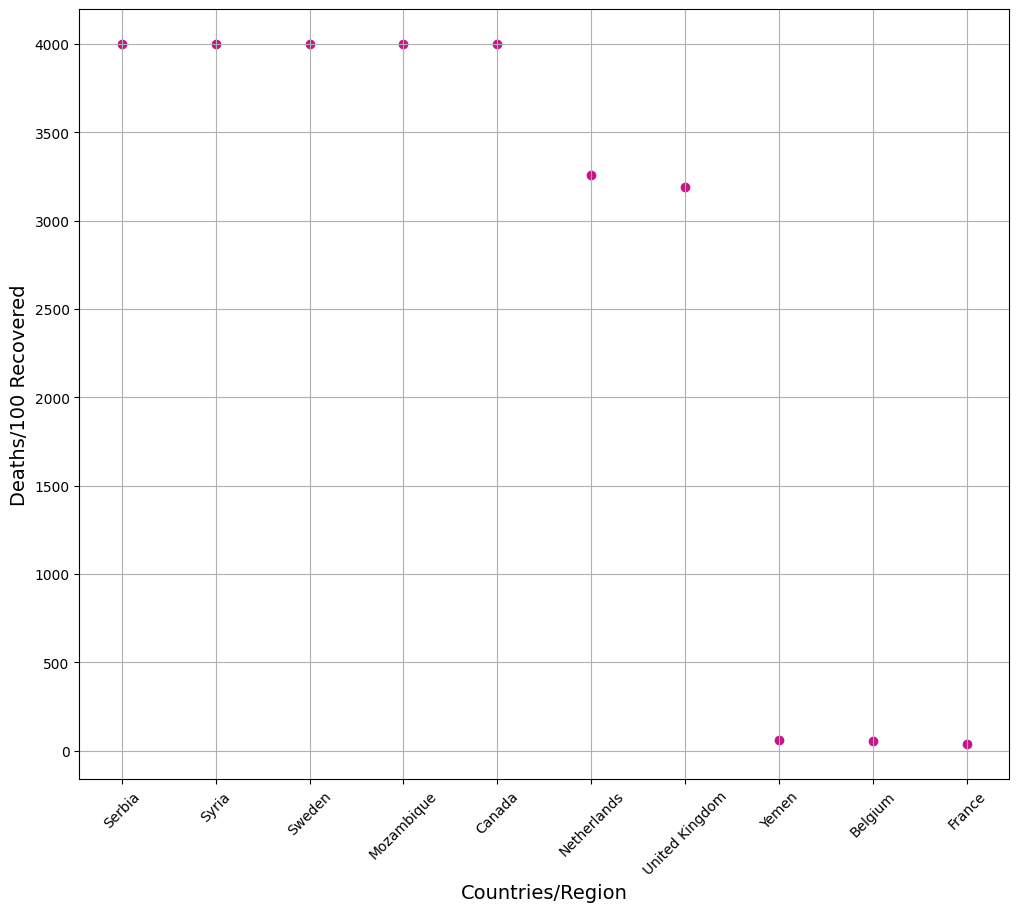

In [133]:
df_deaths_per_recovered=df1[["Country/Region","Deaths / 100 Recovered"]].sort_values(by="Deaths / 100 Recovered",ascending=False).head(10)
# print(np.isinf(df_deaths_per_recovered["Deaths / 100 Recovered"]).sum())

remove_inf=np.nan_to_num(df_deaths_per_recovered["Deaths / 100 Recovered"], posinf=3999, neginf=3999)
# print(np.isinf(df_deaths_per_recovered["Deaths / 100 Recovered"]).sum())
print("--->The 3999 (greater than others) means There is no recovery but only deaths")

print(df_deaths_per_recovered.head(10).to_string())
plt.figure(figsize=(12,10))
plt.scatter(df_deaths_per_recovered["Country/Region"],remove_inf,color="mediumvioletred")
plt.xlabel("Countries/Region",fontsize=14)
plt.ylabel("Deaths/100 Recovered",fontsize=14)
plt.grid()
plt.xticks(rotation=45)

### #Finding (10) => There are 5 countries where there is no recovery but death only that are Serbia, Syria, Sweden,Mozambique, Canada. And Netherlands and UK have more than 3k deaths per recovery rate.

# Summary
In this project, I performed an exploratory data analysis on a COVID-19 dataset containing country-wise data on confirmed cases, deaths, recoveries, new cases, and percentage increases over one week , etc. The objective was to identify the most and least affected countries, regions with the highest recovery rates, and understand global trends and more.

 Various visualizations were created using Matplotlib including:

o Horizontal bar charts to display confirmed cases and death rates per country.

o Grouped bar charts for new cases, deaths, and recoveries.

o Scatter plots for countries with high recovery rates.

o Pie charts for regional distributions of confirmed cases, deaths, and recoveries.

o Handled infinite values (caused by division by zero where recovery cases were zero) by replacing them with a high constant value to maintain plot readability.

#  Conclusion
o The highest number of confirmed COVID-19 cases were reported from countries like US, Brazil and India.

o Several countries achieved over 80% recovery rates, while a few countries had zero recoveries, resulting in extremely high deaths per 100 recovered cases.

o WHO regions such as Americas accounted for a significant share of global confirmed cases and deaths.

o Special care was taken to handle infinite values caused by zero recoveries, highlighting the importance of complete and accurate data reporting.

o The analysis showcased clear disparities in recovery and death rates between countries and regions, emphasizing the role of early intervention, healthcare infrastructure, and reporting practices.

